### tensorflow text classification from the web site

https://www.tensorflow.org/tutorials/keras/basic_text_classification

The purpose is to predict the movie review "sentiment" as either positive or negative

display what backend I am using

In [1]:
from tensorflow import keras
#import keras
import numpy as np

print('backend:',keras.backend.backend())
print('version:', keras.__version__)

backend: tensorflow
version: 2.2.4-tf


#### define the model here
I purposely put the model here because some backends ( such as plaidml ) complained about invalid config/setup
```python
vocab_size = 50000
```
the `vocab_size` determines how many vocabulary to use. The vocabulary index that is beyond this number will be shown with `<UNK>` tag


In [2]:
# input shape is the vocabulary count used for the movie reviews 
vocab_size = 50000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_length=256))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

W0706 16:23:55.955316  3244 deprecation.py:506] From f:\program files\python36\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 16)           800000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 800,289
Trainable params: 800,289
Non-trainable params: 0
_________________________________________________________________


#### download the data
The data already has been "converted" from text to numbers

In [3]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)


#### show sample size and content

In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("Test entries: {}, labels: {}".format(len(test_data), len(test_labels)))

Training entries: 25000, labels: 25000
Test entries: 25000, labels: 25000


In [5]:
print(train_data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


#### not every data (review) has the same length, so we have to "pad" the data
For this run, we are using 265 as the max length of the review.

In [6]:
len(train_data[0]), len(train_data[1])


(218, 189)

In [7]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


#### keras has the padding method

In [8]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)


In [9]:
train_data[470]

array([    1,  2508, 13940,     6,  1718,    23,     4, 17327,    18,
           6,  6945,  1461,     5,   592,  7020,    41,  1099, 24737,
         212,     7,  7131,    39,     4,  2139,   868,   324,    34,
         592,  6960, 21521,    11,  1718,  1399,     5,  2566,    34,
           6,  7349,   177,  7581, 13930,     9,   389,    17,     4,
       11844,     2,   564, 40772,    13,   119,    14,    20,   151,
         171,   409,   306,     8,  2508,   584,   166,    12,     6,
        2286,    11,    61,   274,  2680,    61,   457,    22,     7,
        7553,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

### show how the decoded data ( number => text ) looks like

#### changed to 256 length data

In [10]:
len(train_data[0]), len(train_data[1])


(256, 256)

In [11]:
decode_review(train_data[470])

"<START> kim novak's a witch on the prowl for a mortal lover and james stewart's her choice scintillating comedy of manners from the broadway stage shot by james wong howe in witch color and performed by a sterling cast ernie kovacs is wonderful as the perpetually <UNK> writer redlitch i love this movie though few others seem to kim alone makes it a winner in my book ha my 5 film of 1958 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

#### train the model to recognize "positive" or "negative" review using word-embedding

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


W0706 16:25:00.685201  3244 deprecation.py:323] From f:\program files\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

print('train shape', partial_x_train.shape)

train shape (15000, 256)


In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val)
                    )


Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 147us/sample - loss: 0.6803 - acc: 0.6966 - val_loss: 0.6546 - val_acc: 0.7740
Epoch 2/10
15000/15000 [==============================] - 1s 67us/sample - loss: 0.5860 - acc: 0.8119 - val_loss: 0.5203 - val_acc: 0.8252
Epoch 3/10
15000/15000 [==============================] - 1s 67us/sample - loss: 0.4284 - acc: 0.8623 - val_loss: 0.3970 - val_acc: 0.8544
Epoch 4/10
15000/15000 [==============================] - 1s 66us/sample - loss: 0.3141 - acc: 0.8984 - val_loss: 0.3338 - val_acc: 0.8740
Epoch 5/10
15000/15000 [==============================] - 1s 67us/sample - loss: 0.2458 - acc: 0.9189 - val_loss: 0.3023 - val_acc: 0.8808
Epoch 6/10
15000/15000 [==============================] - 1s 65us/sample - loss: 0.1993 - acc: 0.9353 - val_loss: 0.2843 - val_acc: 0.8872
Epoch 7/10
15000/15000 [==============================] - 1s 67us/sample - loss: 0.1646 - acc: 0.9475 - val_loss: 0

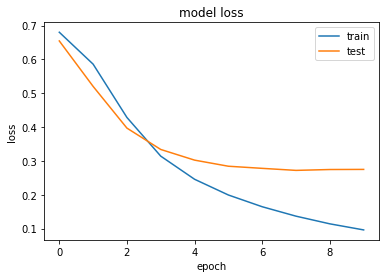

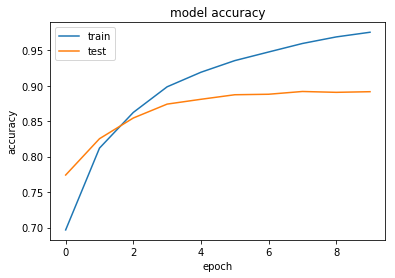

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
# show procession of training...
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### let's see how the model predicts review (positive/negative) on the unseen data

In [16]:
# evaluate againt test data
results = model.evaluate(test_data, test_labels)

print(results)



25000/25000 [==============================] - 1s 52us/sample - loss: 0.2978 - acc: 0.8788
[0.2977615620326996, 0.87876]


### Let's visualize the prediction against the "test data"

In [17]:
# create two arrays with 0 and 1
predictions = model.predict(test_data)
positive=[]
negative=[]
good_matrix = np.zeros( (2,), dtype='int')
good_lowest = 1.0
bad_highest = 0.0
good_index = 0
bad_index = 0

for i in range(test_labels.shape[0]):
    
    # get lowest "good" and highest "bad"
    pv = predictions[i][0]
    expected = test_labels[i]
    
    # append to pos/neg list
    if expected == 1:
        positive.append(pv)
    else:
        negative.append(pv)
    
    # guess cutoff is 0.5
    guess = 1 if pv > 0.5 else 0
    
    # good count
    if guess == expected:
        good_matrix[expected] +=1
    else:
        #find the worst prediction
        if expected == 1:
            if good_lowest > pv:
                good_lowest = pv
                good_index = i
        else:
            if bad_highest < pv:
                bad_highest = pv
                bad_index = i


### How did this simple model predict?
See the histogram to see the distribution of its predictions against positive and negative reviews.

The cutoff for positive is > 0.5

The cutoff for negative is <= 0.5

Positive Reviews: 12500 guessed correctly: 10980 (87.84%) missed: 1520 (12.16%)
Negative Reviews: 12500 guessed correctly: 10989 (87.912%) missed: 1511 (12.088%)

positive median: 0.95507836


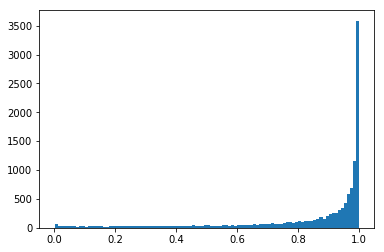

negative median: 0.034539238


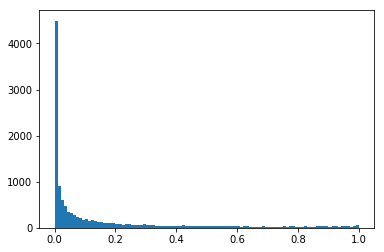

In [18]:
print('Positive Reviews:', len(positive), 
      'guessed correctly:',good_matrix[1], '(' + str(good_matrix[1]*100.0/len(positive)) + '%)',
      'missed:', len(positive) - good_matrix[1], '(' + str( (len(positive) - good_matrix[1])*100.0/len(positive)) + '%)')

print('Negative Reviews:', len(negative), 
      'guessed correctly:',good_matrix[0], '(' + str(good_matrix[0]*100.0/len(negative)) + '%)',
      'missed:', len(negative) - good_matrix[0], '(' + str( (len(negative) - good_matrix[0])*100.0/len(negative)) + '%)')

print()

print('positive median:', np.median(positive))
binwidth=0.01
plt.hist(positive, bins=np.arange(min(positive), max(positive) + binwidth, binwidth))
plt.show()
plt.close()

print('negative median:', np.median(negative))
binwidth=0.01
plt.hist(negative, bins=np.arange(min(negative), max(negative) + binwidth, binwidth))
plt.show()
plt.close()

#### good review guessed as negative
Expected good review but guessed as negative

In [19]:
print('guessed weight:', good_lowest, 'review label value:', test_labels[good_index])
decode_review(test_data[good_index])

guessed weight: 0.0006637573 review label value: 1


"br br pretty insulting overall it looked like a movie funded by the br br european parliament and it tried too hard basically it had all br br sorts of differences that it tried to tie together not a bad thing in br br itself but the result is at best awkward but in fact ridiculous too br br many clashes that wouldn't really happen then the end of the br br movie the last 10 minutes ruined all the rest why doesn't xavier br br talk to the <UNK> students he meets back in paris why does br br he just walk off why does he just run away from his job is that br br freedom and in the end is the new europe supposed to rest on br br a bunch of people who smoke up and shag all day is this what br br it's made up of br br besides the acting was pretty horrible i can't believe judith br br role and acting why was she made to look like br br emanuelle béart so much at first i thought xavier was ok but br br with retrospect i think he was pretty bad br br and that's all really too bad because tech

#### bad review guessed as positive

In [20]:
print('guessed weight:', bad_highest, 'review label value:', test_labels[bad_index])
decode_review(test_data[bad_index])

guessed weight: 0.99936545 review label value: 0


"into violent conclusions <UNK> is no different tough slim ball killer rourke stalks unhappily married witness lane think history of violence meets no country for old men it is not as intense bloody or gory as those two but it is almost as good if you like those two including david equally wonderful eastern promises you will like <UNK> also br br director john madden has not done a lot of movies his last few were enjoyable if not successful proof captain <UNK> and shakespeare in love br br diana lane hasn't had a powerful movie role since she and richard gere gave incredible performances in unfaithful lately she is charming and appealing in romantic stories such as nights in must love dogs and under the <UNK> sun here she is right on mark balancing her sexy appeal with reserved tension br br this is a small part for rosario dawson yet dawson does a good job with it you see a lot more of lane including an underwear scene to rival sigourney weaver in aliens and nicole kidman in eyes wide

#### Let's check how this simple model actually  performs against my own review.

In [ ]:
from keras.preprocessing.text import text_to_word_sequence


In [ ]:
# predict function
def mypredict(text):
    result = text_to_word_sequence(text)
    print(result)
    mydata = np.zeros(256,dtype='int')
    mydata[0] = 1
    index = 1
    for w in result:
        if w in word_index.keys():
            iv = word_index[w]
            if iv >= vocab_size:
                iv = 2
        else:
            iv=2
        mydata[index]=iv
        index += 1

    print(mydata)
    #decode_review(mydata)
    indata = np.reshape(mydata, (1,256))
    #print(indata.shape)
    #print(indata)
    gr = model.predict(indata)
    return gr[0][0]
    

In [ ]:
mypredict("<START> this film was the worst movie I ever saw. Anyone planning to go, please spend your money else where")

#### the output is  <= 0.5 so it correctly guessed that my review was a negative review